# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Reading Dataset

In [2]:
df=pd.read_csv('Myocardial infarction complications.csv')

In [3]:
df.drop('ID',
  axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, AGE to LET_IS
dtypes: float64(110), int64(13)
memory usage: 1.6 MB


In [5]:
df

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0,0,1,0,1,0,0,0,0,3
1696,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,1
1697,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0,0,0,1,0,0,0,0,0,1


In [6]:
missing_list=df.isnull().sum().tolist()

# Counting null values for continuous values

In [7]:
b=[]
cont=["AGE","S_AD_KBRIG","D_AD_KBRIG","S_AD_ORIT","D_AD_ORIT","K_BLOOD","NA_BLOOD","ALT_BLOOD","AST_BLOOD","KFK_BLOOD","L_BLOOD","ROE"]
for i in cont:
    a=df[i].isnull().sum()
    b.append(a)
b

[8, 1076, 1076, 267, 267, 371, 375, 284, 285, 1696, 125, 203]

In [8]:
missing_list

[8,
 0,
 4,
 106,
 73,
 51,
 1628,
 9,
 8,
 248,
 54,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 11,
 10,
 10,
 7,
 7,
 7,
 7,
 7,
 1076,
 1076,
 267,
 267,
 12,
 15,
 14,
 12,
 12,
 12,
 83,
 80,
 80,
 72,
 1,
 152,
 152,
 152,
 152,
 152,
 152,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 369,
 371,
 375,
 375,
 284,
 285,
 1696,
 125,
 203,
 126,
 16,
 108,
 128,
 657,
 686,
 677,
 9,
 5,
 108,
 131,
 10,
 110,
 131,
 10,
 11,
 13,
 17,
 17,
 16,
 16,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [9]:
df.columns.to_list()

['AGE',
 'SEX',
 'INF_ANAM',
 'STENOK_AN',
 'FK_STENOK',
 'IBS_POST',
 'IBS_NASL',
 'GB',
 'SIM_GIPERT',
 'DLIT_AG',
 'ZSN_A',
 'nr_11',
 'nr_01',
 'nr_02',
 'nr_03',
 'nr_04',
 'nr_07',
 'nr_08',
 'np_01',
 'np_04',
 'np_05',
 'np_07',
 'np_08',
 'np_09',
 'np_10',
 'endocr_01',
 'endocr_02',
 'endocr_03',
 'zab_leg_01',
 'zab_leg_02',
 'zab_leg_03',
 'zab_leg_04',
 'zab_leg_06',
 'S_AD_KBRIG',
 'D_AD_KBRIG',
 'S_AD_ORIT',
 'D_AD_ORIT',
 'O_L_POST',
 'K_SH_POST',
 'MP_TP_POST',
 'SVT_POST',
 'GT_POST',
 'FIB_G_POST',
 'ant_im',
 'lat_im',
 'inf_im',
 'post_im',
 'IM_PG_P',
 'ritm_ecg_p_01',
 'ritm_ecg_p_02',
 'ritm_ecg_p_04',
 'ritm_ecg_p_06',
 'ritm_ecg_p_07',
 'ritm_ecg_p_08',
 'n_r_ecg_p_01',
 'n_r_ecg_p_02',
 'n_r_ecg_p_03',
 'n_r_ecg_p_04',
 'n_r_ecg_p_05',
 'n_r_ecg_p_06',
 'n_r_ecg_p_08',
 'n_r_ecg_p_09',
 'n_r_ecg_p_10',
 'n_p_ecg_p_01',
 'n_p_ecg_p_03',
 'n_p_ecg_p_04',
 'n_p_ecg_p_05',
 'n_p_ecg_p_06',
 'n_p_ecg_p_07',
 'n_p_ecg_p_08',
 'n_p_ecg_p_09',
 'n_p_ecg_p_10',
 'n_p

# Making list of Categorical and continous varibale for imputataions

In [10]:
continuous_param_list=["AGE","S_AD_KBRIG","D_AD_KBRIG","S_AD_ORIT","D_AD_ORIT","K_BLOOD","NA_BLOOD","ALT_BLOOD","AST_BLOOD","KFK_BLOOD","L_BLOOD","ROE"]

In [11]:
len(continuous_param_list)

12

In [12]:
categorical_param_list=[ 'SEX','INF_ANAM','STENOK_AN','FK_STENOK','IBS_POST','IBS_NASL','GB','SIM_GIPERT','DLIT_AG','ZSN_A',
'nr_11','nr_01','nr_02','nr_03','nr_04','nr_07','nr_08','np_01','np_04','np_05','np_07',
 'np_08',
 'np_09',
 'np_10',
 'endocr_01',
 'endocr_02',
 'endocr_03',
 'zab_leg_01',
 'zab_leg_02',
 'zab_leg_03',
 'zab_leg_04',
 'zab_leg_06',
 'O_L_POST',
 'K_SH_POST',
 'MP_TP_POST',
 'SVT_POST',
 'GT_POST',
 'FIB_G_POST',
 'ant_im',
 'lat_im',
 'inf_im',
 'post_im',
 'IM_PG_P',
 'ritm_ecg_p_01',
 'ritm_ecg_p_02',
 'ritm_ecg_p_04',
 'ritm_ecg_p_06',
 'ritm_ecg_p_07',
 'ritm_ecg_p_08',
 'n_r_ecg_p_01',
 'n_r_ecg_p_02',
 'n_r_ecg_p_03',
 'n_r_ecg_p_04',
 'n_r_ecg_p_05',
 'n_r_ecg_p_06',
 'n_r_ecg_p_08',
 'n_r_ecg_p_09',
 'n_r_ecg_p_10',
 'n_p_ecg_p_01',
 'n_p_ecg_p_03',
 'n_p_ecg_p_04',
 'n_p_ecg_p_05',
 'n_p_ecg_p_06',
 'n_p_ecg_p_07',
 'n_p_ecg_p_08',
 'n_p_ecg_p_09',
 'n_p_ecg_p_10',
 'n_p_ecg_p_11',
 'n_p_ecg_p_12',
 'fibr_ter_01',
 'fibr_ter_02',
 'fibr_ter_03',
 'fibr_ter_05',
 'fibr_ter_06',
 'fibr_ter_07',
 'fibr_ter_08',
 'GIPO_K',
 'GIPER_NA',
 'TIME_B_S',
 'R_AB_1_n',
 'R_AB_2_n',
 'R_AB_3_n',
 'NA_KB',
 'NOT_NA_KB',
 'LID_KB',
 'NITR_S',
 'NA_R_1_n',
 'NA_R_2_n',
 'NA_R_3_n',
 'NOT_NA_1_n',
 'NOT_NA_2_n',
 'NOT_NA_3_n',
 'LID_S_n',
 'B_BLOK_S_n',
 'ANT_CA_S_n',
 'GEPAR_S_n',
 'ASP_S_n',
 'TIKL_S_n',
 'TRENT_S_n',
 'FIBR_PREDS',
 'PREDS_TAH',
 'JELUD_TAH',
 'FIBR_JELUD',
 'A_V_BLOK',
 'OTEK_LANC',
 'RAZRIV',
 'DRESSLER',
 'ZSN',
 'REC_IM',
 'P_IM_STEN',
 'LET_IS']


In [13]:
len(categorical_param_list)

111

# Median imputation for continuous values

In [14]:
for column in continuous_param_list:
    df[column].fillna(df[column].median(),inplace=True)


# Mode Imputation for categorical values 

In [15]:
for column in categorical_param_list:
    df[column].fillna(df[column].mode()[0],inplace=True)

In [16]:
missing_list=df.isnull().sum().tolist()

In [17]:
missing_list.count(0)

123

In [18]:
df['S_AD_KBRIG'].isin([140]).sum()

1167

In [19]:
df['K_BLOOD'].isin([4.1]).sum()

433

In [20]:
df['IBS_POST'].isin([2]).sum()

734

In [21]:
df['SIM_GIPERT'].isin([0]).sum()

1643

In [22]:
df['DLIT_AG'].isin([0]).sum()

799

In [23]:
df.dtypes

AGE          float64
SEX            int64
INF_ANAM     float64
STENOK_AN    float64
FK_STENOK    float64
              ...   
DRESSLER       int64
ZSN            int64
REC_IM         int64
P_IM_STEN      int64
LET_IS         int64
Length: 123, dtype: object

In [24]:
df_new = df['LET_IS']
df_new

0       0
1       0
2       0
3       0
4       0
       ..
1695    3
1696    1
1697    6
1698    1
1699    1
Name: LET_IS, Length: 1700, dtype: int64

# Function for normalizing continuous data 

In [25]:
for column in continuous_param_list:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [26]:
df

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,0.772727,1,2.0,1.0,1.0,2.0,0.0,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,0.439394,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.393939,1,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0.636364,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,0.515152,1,0.0,0.0,0.0,2.0,0.0,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.772727,0,0.0,4.0,2.0,1.0,0.0,2.0,0.0,7.0,...,0,0,1,0,1,0,0,0,0,3
1696,0.666667,0,0.0,6.0,2.0,1.0,0.0,2.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,1
1697,0.439394,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,0.803030,0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,7.0,...,0,0,0,1,0,0,0,0,0,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, AGE to LET_IS
dtypes: float64(110), int64(13)
memory usage: 1.6 MB


In [28]:
df.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.543369,0.626471,0.553529,2.171765,1.239412,1.185882,0.015882,1.396471,0.033529,2.852941,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,0.170207,0.483883,0.836248,2.428718,1.030883,0.802168,0.125057,1.086809,0.180067,3.096946,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.424242,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.560606,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,1.000000,1.000000,5.000000,2.000000,2.000000,0.000000,2.000000,0.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.000000,3.000000,1.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [29]:
df.corr()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
AGE,1.000000,-0.393314,0.098337,0.198431,0.199387,0.111527,-0.131254,0.235251,-0.024195,0.220639,...,-0.030780,-0.034621,0.042728,0.104495,0.124377,-0.077712,0.145761,0.090824,-0.018696,0.157607
SEX,-0.393314,1.000000,0.039988,-0.075089,-0.108522,-0.081830,0.010556,-0.255451,-0.065584,-0.290796,...,0.044560,0.027478,0.008722,-0.065186,-0.075090,0.035616,-0.097490,-0.065186,-0.016035,-0.086326
INF_ANAM,0.098337,0.039988,1.000000,0.313088,0.324794,0.211532,-0.027833,0.101625,-0.017789,0.097358,...,-0.073652,-0.022161,-0.017789,0.094218,-0.067768,-0.053159,0.018192,0.038638,0.047615,0.069317
STENOK_AN,0.198431,-0.075089,0.313088,1.000000,0.682466,0.282993,-0.034179,0.117565,-0.018560,0.177549,...,-0.036231,-0.002659,0.002974,0.100420,0.027249,-0.061209,0.020856,0.117893,0.071824,0.088865
FK_STENOK,0.199387,-0.108522,0.324794,0.682466,1.000000,0.405236,-0.038643,0.117486,-0.002050,0.113722,...,-0.022266,0.025684,-0.021074,0.119447,-0.006276,-0.055467,-0.003149,0.095924,0.104403,0.085876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DRESSLER,-0.077712,0.035616,-0.053159,-0.061209,-0.055467,-0.060513,-0.004380,-0.065213,0.023635,-0.032355,...,0.039620,0.012424,-0.024103,-0.000145,-0.022579,1.000000,0.058501,0.009693,-0.025700,-0.053456
ZSN,0.145761,-0.097490,0.018192,0.020856,-0.003149,0.003064,-0.058626,0.040790,-0.001631,0.025639,...,0.011369,-0.010141,-0.001631,0.125196,-0.067689,0.058501,1.000000,0.086894,-0.045993,-0.038309
REC_IM,0.090824,-0.065186,0.038638,0.117893,0.095924,0.074177,-0.008488,0.016662,0.007506,0.032876,...,0.052993,0.044024,0.007506,0.174350,-0.023622,0.009693,0.086894,1.000000,0.029793,0.098199
P_IM_STEN,-0.018696,-0.016035,0.047615,0.071824,0.104403,0.068922,0.010838,-0.014744,-0.011155,0.051060,...,-0.035708,-0.043609,-0.057518,-0.070530,-0.055933,-0.025700,-0.045993,0.029793,1.000000,-0.096070


# Data Visualization

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

5.1.0


In [32]:
import cufflinks as cf

In [33]:
# For Notebooks
init_notebook_mode(connected=True)

In [34]:
cf.go_offline()

In [35]:
df.iplot(kind='scatter',x='SEX',y='LET_IS',mode='markers',size=10)

In [36]:
df.iplot(kind='scatter',x='LET_IS',y='INF_ANAM',mode='markers',size=10)

In [37]:
df.iplot(kind='scatter',x='LET_IS',y='STENOK_AN',mode='markers',size=10)

In [38]:
df.count().iplot(kind='bar')

In [39]:
df['LET_IS'].iplot(kind='hist',bins=25)

In [40]:
df['SEX'].iplot(kind='hist',bins=25)

In [41]:
df['INF_ANAM'].iplot(kind='hist',bins=25)

In [42]:
df['FK_STENOK'].iplot(kind='hist',bins=25)

In [43]:
df['IBS_POST'].iplot(kind='hist',bins=25)

In [44]:
df.iplot(kind='bubble',x='LET_IS',y='SEX',size='IBS_POST')

In [45]:
df.iplot(kind='bubble',x='LET_IS',y='IBS_POST',size='SEX')

In [46]:
df[['LET_IS','SEX']].iplot(kind='spread')

C:\Users\sony\anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\sony\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [47]:
df[['LET_IS','DLIT_AG']].iplot(kind='spread')

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='LET_IS', ylabel='Density'>

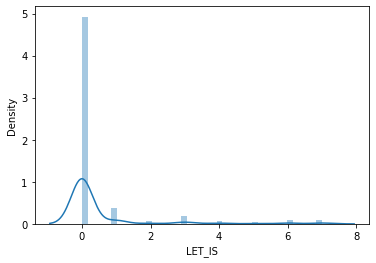

In [48]:
sns.distplot(df['LET_IS'])

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='SEX', ylabel='Density'>

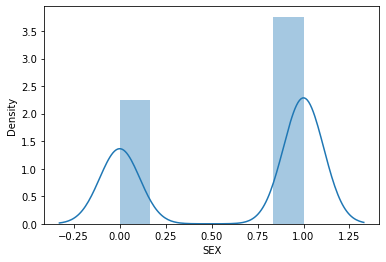

In [49]:

sns.distplot(df['SEX'])

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='SVT_POST', ylabel='Density'>

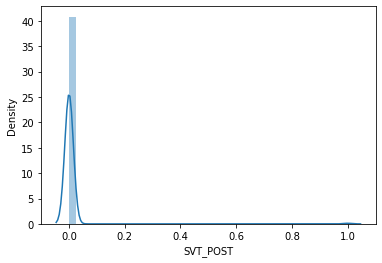

In [50]:
sns.distplot(df['SVT_POST'])

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='K_SH_POST', ylabel='Density'>

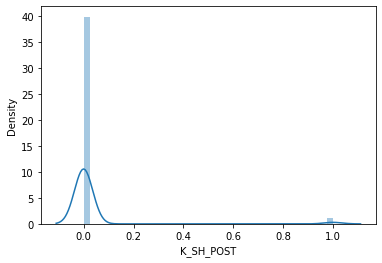

In [51]:
sns.distplot(df['K_SH_POST'])

<AxesSubplot:xlabel='SEX', ylabel='LET_IS'>

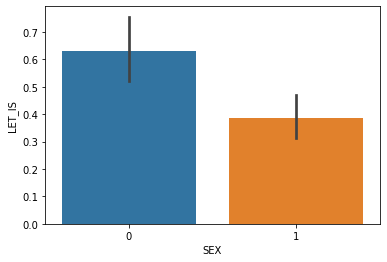

In [52]:
sns.barplot(x='SEX',y='LET_IS',data=df)

<AxesSubplot:xlabel='SVT_POST', ylabel='LET_IS'>

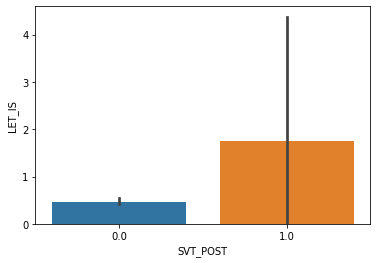

In [53]:
sns.barplot(x='SVT_POST',y='LET_IS',data=df)

<AxesSubplot:xlabel='LET_IS', ylabel='count'>

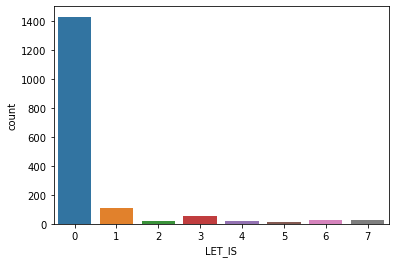

In [54]:
sns.countplot(x = 'LET_IS', data = df)

<AxesSubplot:xlabel='SEX', ylabel='count'>

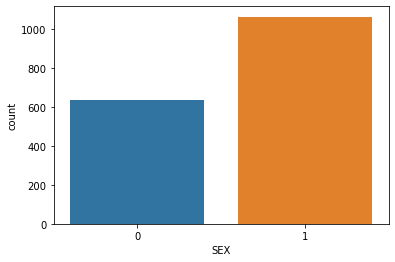

In [55]:
sns.countplot(x = 'SEX', data = df)

<AxesSubplot:xlabel='SEX', ylabel='LET_IS'>

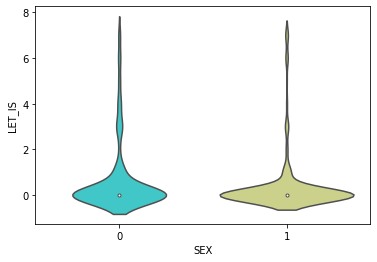

In [56]:
sns.violinplot(x="SEX", y="LET_IS", data=df,palette='rainbow')

<AxesSubplot:xlabel='LET_IS', ylabel='SVT_POST'>

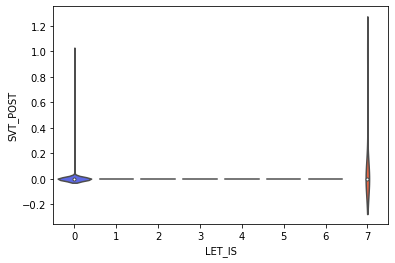

In [57]:
sns.violinplot(x="LET_IS", y="SVT_POST", data=df,palette='rainbow')

# Feature Engg using chi2

In [58]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [59]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [60]:
column_list = df.columns.tolist()

In [61]:
column_list.remove('LET_IS')
len(column_list)

122

In [62]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
fit.scores_

array([4.62026571e+00, 1.51030943e+01, 5.02338566e+01, 7.74634517e+01,
       4.33239412e+01, 3.07487375e+01, 5.12036389e+00, 1.90291182e+01,
       9.37589009e+00, 7.23900437e+01, 2.50976114e+02, 6.36360820e+00,
       2.22878081e+01, 4.18587642e+00, 1.26414813e+01, 5.32513073e+01,
       1.89643107e-01, 2.54033335e+00, 1.43355623e+01, 3.73770596e+00,
       5.53884306e+00, 1.89643107e-01, 1.54888799e+01, 3.79286214e-01,
       2.71857440e+01, 2.63512347e+01, 2.09257152e+01, 1.36639637e+00,
       7.81213774e+00, 3.42825939e+01, 2.32529066e+01, 4.34563267e+00,
       2.54941617e+00, 1.38312180e+00, 1.21381147e+00, 5.34763010e+00,
       5.01767110e+00, 6.68483562e+01, 5.21733122e+02, 5.29168988e+01,
       2.88348755e+01, 1.21838221e+00, 1.87698259e+01, 6.86391688e+01,
       2.84660378e+01, 9.75271324e+00, 6.69603632e+00, 4.79146935e+01,
       2.83532451e+01, 6.36891156e+01, 3.24294622e+01, 1.89643107e-01,
       4.23017727e+01, 3.24303941e+00, 4.92193658e+00, 7.15693440e+00,
      

In [63]:
len(fit.scores_)

122

# Making dict of score and feature  using df.columns as list and chi2 score as values as to get idea of weights of each columns

In [64]:
d=dict();
for i in range(len(fit.scores_)):
    d[column_list[i]]= fit.scores_[i]

In [65]:
d

{'AGE': 4.620265712697622,
 'SEX': 15.103094326907588,
 'INF_ANAM': 50.23385658922355,
 'STENOK_AN': 77.46345173959232,
 'FK_STENOK': 43.32394124440978,
 'IBS_POST': 30.74873753634574,
 'IBS_NASL': 5.12036389083275,
 'GB': 19.029118180963344,
 'SIM_GIPERT': 9.375890089917757,
 'DLIT_AG': 72.3900437314849,
 'ZSN_A': 250.97611448111095,
 'nr_11': 6.3636082014901705,
 'nr_01': 22.28780810201384,
 'nr_02': 4.185876418538199,
 'nr_03': 12.641481292985846,
 'nr_04': 53.25130731846933,
 'nr_07': 0.1896431070678796,
 'nr_08': 2.540333354539093,
 'np_01': 14.335562294274682,
 'np_04': 3.7377059609389907,
 'np_05': 5.538843060886448,
 'np_07': 0.1896431070678796,
 'np_08': 15.488879935346,
 'np_09': 0.3792862141357592,
 'np_10': 27.1857440132914,
 'endocr_01': 26.35123471869056,
 'endocr_02': 20.92571524399802,
 'endocr_03': 1.3663963747938555,
 'zab_leg_01': 7.812137737140087,
 'zab_leg_02': 34.28259390106423,
 'zab_leg_03': 23.252906618410016,
 'zab_leg_04': 4.345632673834212,
 'zab_leg_06': 2

# Filtering the dict based on values of score you wish to have among the chi2 predicted scores eg- 10,15,20

In [66]:
high_score_features={k:v for (k,v) in d.items() if v > 15}

In [67]:
high_score_features

{'SEX': 15.103094326907588,
 'INF_ANAM': 50.23385658922355,
 'STENOK_AN': 77.46345173959232,
 'FK_STENOK': 43.32394124440978,
 'IBS_POST': 30.74873753634574,
 'GB': 19.029118180963344,
 'DLIT_AG': 72.3900437314849,
 'ZSN_A': 250.97611448111095,
 'nr_01': 22.28780810201384,
 'nr_04': 53.25130731846933,
 'np_08': 15.488879935346,
 'np_10': 27.1857440132914,
 'endocr_01': 26.35123471869056,
 'endocr_02': 20.92571524399802,
 'zab_leg_02': 34.28259390106423,
 'zab_leg_03': 23.252906618410016,
 'O_L_POST': 66.84835617972199,
 'K_SH_POST': 521.7331222387054,
 'MP_TP_POST': 52.916898825161205,
 'SVT_POST': 28.834875463286945,
 'FIB_G_POST': 18.7698258570055,
 'ant_im': 68.63916881152855,
 'lat_im': 28.46603775221081,
 'IM_PG_P': 47.914693470746656,
 'ritm_ecg_p_01': 28.35324510890257,
 'ritm_ecg_p_02': 63.689115613126745,
 'ritm_ecg_p_04': 32.42946221681732,
 'ritm_ecg_p_07': 42.30177266373134,
 'n_r_ecg_p_04': 19.753233152681435,
 'n_r_ecg_p_05': 42.57467555517271,
 'n_r_ecg_p_06': 29.8685459

In [68]:
len(high_score_features)

53

In [69]:
selected_features = []
for k,v in high_score_features.items():
    selected_features.append(k)
selected_features

['SEX',
 'INF_ANAM',
 'STENOK_AN',
 'FK_STENOK',
 'IBS_POST',
 'GB',
 'DLIT_AG',
 'ZSN_A',
 'nr_01',
 'nr_04',
 'np_08',
 'np_10',
 'endocr_01',
 'endocr_02',
 'zab_leg_02',
 'zab_leg_03',
 'O_L_POST',
 'K_SH_POST',
 'MP_TP_POST',
 'SVT_POST',
 'FIB_G_POST',
 'ant_im',
 'lat_im',
 'IM_PG_P',
 'ritm_ecg_p_01',
 'ritm_ecg_p_02',
 'ritm_ecg_p_04',
 'ritm_ecg_p_07',
 'n_r_ecg_p_04',
 'n_r_ecg_p_05',
 'n_r_ecg_p_06',
 'n_p_ecg_p_03',
 'n_p_ecg_p_06',
 'n_p_ecg_p_08',
 'n_p_ecg_p_12',
 'TIME_B_S',
 'R_AB_1_n',
 'R_AB_3_n',
 'NITR_S',
 'NA_R_1_n',
 'NA_R_3_n',
 'NOT_NA_1_n',
 'NOT_NA_2_n',
 'NOT_NA_3_n',
 'ANT_CA_S_n',
 'ASP_S_n',
 'FIBR_JELUD',
 'A_V_BLOK',
 'OTEK_LANC',
 'RAZRIV',
 'ZSN',
 'REC_IM',
 'P_IM_STEN']

# Making Data set Compatible with Feature Engg selected features only and dropping rest features automatically and no updation from user needed

In [70]:
for i in df.columns:
    if i not in selected_features:
        df.drop(i,axis=1, inplace=True)
    else:
        pass

In [71]:
df['LET_IS'] = df_new

In [72]:
df

,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,DLIT_AG,ZSN_A,nr_01,nr_04,...,ANT_CA_S_n,ASP_S_n,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,2.0,1.0,1.0,2.0,3.0,7.0,0.0,0.0,0.0,...,0.0,1.0,0,0,0,0,0,0,0,0
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0,0,0,0,0,0,0,0
3,0,0.0,0.0,0.0,2.0,2.0,3.0,1.0,0.0,0.0,...,1.0,1.0,0,0,0,0,1,0,0,0
4,1,0.0,0.0,0.0,2.0,3.0,7.0,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0,0.0,4.0,2.0,1.0,2.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0,1,0,1,0,0,0,3
1696,0,0.0,6.0,2.0,1.0,2.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,1
1697,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0,0,0,0,0,1,0,6
1698,0,2.0,2.0,2.0,1.0,2.0,7.0,0.0,0.0,1.0,...,1.0,1.0,0,0,1,0,0,0,0,1


In [73]:
a=df.isnull().sum()
a.sum()

0

# Data Visualization

<AxesSubplot:>

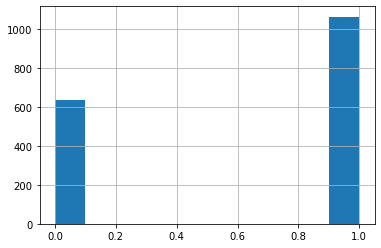

In [74]:
df['SEX'].hist()

<AxesSubplot:>

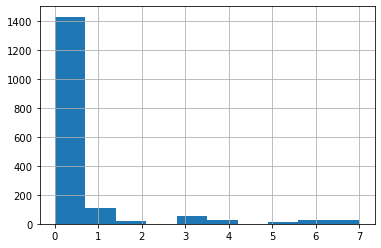

In [75]:
df['LET_IS'].hist()

<AxesSubplot:>

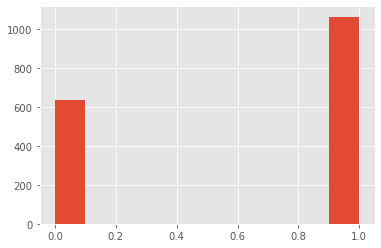

In [76]:
plt.style.use('ggplot')

df['SEX'].hist()

<AxesSubplot:ylabel='Density'>

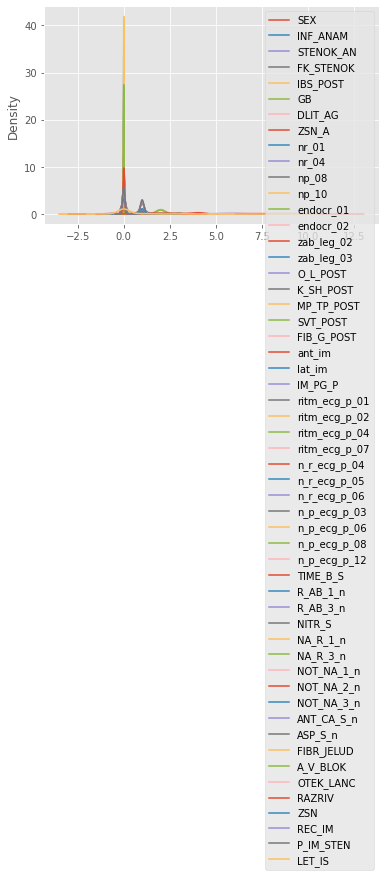

In [77]:
df.plot.density()

In [78]:
df.iplot(kind='bar',x='LET_IS',y='SEX')

In [79]:
df.iplot(kind='bar',x='LET_IS',y='INF_ANAM')

In [80]:
df.iplot(kind='bar',x='LET_IS',y='STENOK_AN')

In [81]:
df.iplot(kind='bar',x='LET_IS',y='FK_STENOK')

In [82]:
df.count().iplot(kind='bar')

In [83]:
df[['SEX','LET_IS']].iplot(kind='spread')

C:\Users\sony\anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\sony\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [84]:
df[['LET_IS','INF_ANAM']].iplot(kind='spread')

In [85]:
df[['LET_IS','FK_STENOK']].iplot(kind='spread')

In [86]:
df.iplot(kind='bubble',x='SEX',y='LET_IS',size='IBS_POST')

In [87]:
df.iplot(kind='bubble',x='LET_IS',y='GB',size='DLIT_AG')

In [88]:
df.iplot(kind='bubble',x='LET_IS',y='ant_im',size='lat_im')

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='SEX', ylabel='Density'>

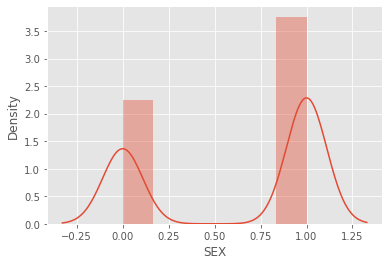

In [89]:
sns.distplot(df['SEX'])

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='LET_IS', ylabel='Density'>

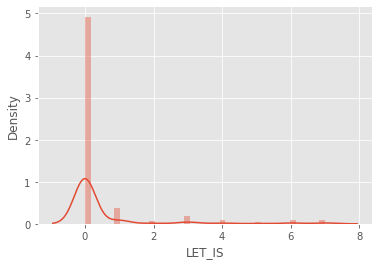

In [90]:
sns.distplot(df['LET_IS'])

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='GB', ylabel='Density'>

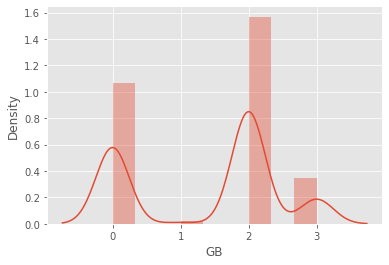

In [91]:
sns.distplot(df['GB'])

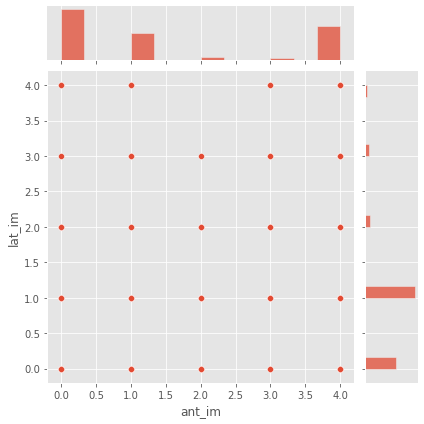

In [92]:
sns.jointplot(x='ant_im',y='lat_im',data=df,kind='scatter')

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='FIB_G_POST', ylabel='Density'>

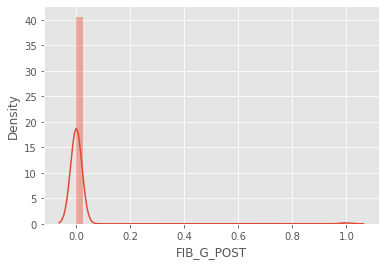

In [93]:
sns.distplot(df['FIB_G_POST'])


# Checking balance for y which shows large imbalance and we need dataset balancing for it 

In [94]:
df.LET_IS.value_counts()

0    1429
1     110
3      54
6      27
7      27
4      23
2      18
5      12
Name: LET_IS, dtype: int64

# Balancing imbalanced dataset for train set only

In [95]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(df.drop(labels=['LET_IS'], axis=1),df['LET_IS'],test_size=0.2,random_state=41)


# ## Train dataset balancing

from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#y_train_res
#X_train_res

[(0, 1140), (1, 1140), (2, 1140), (3, 1140), (4, 1140), (5, 1140), (6, 1140), (7, 1140)]


# Decision Tree  method

In [96]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [97]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy',max_depth=9)
dtree.fit(x_train_res, y_train_res)
# Test Accuracy,confusion matrix, classification report
y_pred_DT_test=dtree.predict(x_test)
print ('Accuracy test:', accuracy_score(y_test, y_pred_DT_test))
print ('Confusion matrix:', confusion_matrix(y_test, y_pred_DT_test))
print ('classification report test:', classification_report(y_test, y_pred_DT_test))
# Train Accuracy
y_pred_DT_train=dtree.predict(x_train_res)
print ('Accuracy train:', accuracy_score(y_train_res, y_pred_DT_train))

Accuracy test: 0.7470588235294118
Confusion matrix: [[230  12   6   0   6   7  13  15]
 [  3  10   4   0   0   1   0   4]
 [  3   0   0   0   1   0   0   0]
 [  0   0   0  13   0   0   0   0]
 [  4   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   1   0]
 [  1   0   0   0   0   1   1   0]
 [  2   1   0   0   0   0   0   0]]
classification report test:               precision    recall  f1-score   support

           0       0.94      0.80      0.86       289
           1       0.43      0.45      0.44        22
           2       0.00      0.00      0.00         4
           3       1.00      1.00      1.00        13
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.07      0.33      0.11         3
           7       0.00      0.00      0.00         3

    accuracy                           0.75       340
   macro avg       0.31      0.32      0.30       340
weighted avg       0.87      0.75      0.80

# Finding optimum value of max_depth for improving accuracy for DT using Gridsearch CV on train balanced dataset

In [98]:
from sklearn.model_selection import GridSearchCV
max_depth = np.array(range(1,10))
param_grid = dict(max_depth=max_depth)
model = DecisionTreeClassifier(criterion = 'entropy')
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train_res, y_train_res)
print(grid.best_score_)
print(grid.best_params_)

0.8905701754385966
{'max_depth': 9}


# KNN Method 

In [99]:
model_KNN = KNeighborsClassifier(n_neighbors=2)
model_KNN.fit(x_train_res, y_train_res)
# Test Accuracy,confusion matrix, classification report
y_pred_KNN_test=model_KNN.predict(x_test)
print ('Accuracy test:', accuracy_score(y_test, y_pred_KNN_test))
print ('Confusion matrix test:', confusion_matrix(y_test, y_pred_KNN_test))
print ('classification report test:', classification_report(y_test, y_pred_KNN_test))
# Train Accuracy
y_pred_KNN_train=model_KNN.predict(x_train_res)
print ('Accuracy train:', accuracy_score(y_train_res, y_pred_KNN_train))


Accuracy test: 0.7323529411764705
Confusion matrix test: [[237   9   2   5   9   7  19   1]
 [ 10   8   0   1   0   0   1   2]
 [  1   1   1   0   0   0   1   0]
 [  7   2   0   3   0   0   1   0]
 [  1   0   0   0   0   0   3   0]
 [  1   0   0   0   1   0   0   0]
 [  2   0   0   1   0   0   0   0]
 [  2   0   0   1   0   0   0   0]]
classification report test:               precision    recall  f1-score   support

           0       0.91      0.82      0.86       289
           1       0.40      0.36      0.38        22
           2       0.33      0.25      0.29         4
           3       0.27      0.23      0.25        13
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3

    accuracy                           0.73       340
   macro avg       0.24      0.21      0.22       340
weighted avg       0.81      0.73     

# Finding optimum value of n_neighbours for improving accuracy for KNN using Gridsearch CV on train balanced dataset

In [100]:
from sklearn.model_selection import GridSearchCV
import numpy

In [101]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [102]:
model_1 = KNeighborsClassifier()
grid = GridSearchCV(estimator=model_1, param_grid=param_grid)
grid.fit(x_train_res, y_train_res)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [103]:
print(grid.best_score_)
print(grid.best_params_)

0.9728070175438598
{'n_neighbors': 2}


# Random Forest 

In [104]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 130
max_features = 4
model_RF = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model_RF.fit(x_train_res, y_train_res)
# Test Accuracy,confusion matrix, classification report
y_pred_RF_test=model_RF.predict(x_test)
print ('Accuracy test:', accuracy_score(y_test, y_pred_RF_test))
print ('Confusion matrix test:', confusion_matrix(y_test, y_pred_RF_test))
print ('classification report test:', classification_report(y_test, y_pred_RF_test))
# Train Accuracy
y_pred_RF_train=model_RF.predict(x_train_res)
print ('Accuracy train:', accuracy_score(y_train_res, y_pred_RF_train))


Accuracy test: 0.9117647058823529
Confusion matrix test: [[288   1   0   0   0   0   0   0]
 [ 13   9   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0]
 [  0   0   0  13   0   0   0   0]
 [  4   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0]
 [  2   1   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0]]
classification report test:               precision    recall  f1-score   support

           0       0.91      1.00      0.95       289
           1       0.82      0.41      0.55        22
           2       0.00      0.00      0.00         4
           3       1.00      1.00      1.00        13
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3

    accuracy                           0.91       340
   macro avg       0.34      0.30      0.31       340
weighted avg       0.87      0.91     

C:\Users\sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy train: 1.0


# Finding optimum value of n_estimators and max_features for improving accuracy for RF using Gridsearch CV on train balanced dataset

In [105]:
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array(range(100,150))
param_grid = dict(n_estimators=n_neighbors)
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train_res, y_train_res)
print(grid.best_score_)
print(grid.best_params_)

0.9913377192982455
{'n_estimators': 117}


In [106]:
from sklearn.model_selection import GridSearchCV
max_features = np.array(range(1,5))
param_grid = dict(max_features=max_features)
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train_res, y_train_res)
print(grid.best_score_)
print(grid.best_params_)

0.9914473684210525
{'max_features': 2}


In [107]:
df

,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,DLIT_AG,ZSN_A,nr_01,nr_04,...,ANT_CA_S_n,ASP_S_n,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,2.0,1.0,1.0,2.0,3.0,7.0,0.0,0.0,0.0,...,0.0,1.0,0,0,0,0,0,0,0,0
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0,0,0,0,0,0,0,0
3,0,0.0,0.0,0.0,2.0,2.0,3.0,1.0,0.0,0.0,...,1.0,1.0,0,0,0,0,1,0,0,0
4,1,0.0,0.0,0.0,2.0,3.0,7.0,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0,0.0,4.0,2.0,1.0,2.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0,1,0,1,0,0,0,3
1696,0,0.0,6.0,2.0,1.0,2.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,1
1697,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0,0,0,0,0,1,0,6
1698,0,2.0,2.0,2.0,1.0,2.0,7.0,0.0,0.0,1.0,...,1.0,1.0,0,0,1,0,0,0,0,1


# Testing individual models for Overall dataset

In [108]:
array = df.values
X_overall = array[:, 0:-1]
Y_overall = array[:, -1]

In [109]:
X_overall

array([[1., 2., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 3., 6., ..., 0., 1., 0.],
       [0., 2., 2., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 0.]])

In [110]:
Y_overall

array([0., 0., 0., ..., 6., 1., 1.])

In [111]:
# DT for Overall

In [112]:
y_pred_DT_overall=dtree.predict(X_overall)
print ('Accuracy overall:', accuracy_score(Y_overall, y_pred_DT_overall))
print ('classification report overall:', classification_report(Y_overall, y_pred_DT_overall))

Accuracy overall: 0.821764705882353
classification report overall:               precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      1429
         1.0       0.66      0.53      0.59       110
         2.0       0.24      0.61      0.35        18
         3.0       1.00      1.00      1.00        54
         4.0       0.51      0.78      0.62        23
         5.0       0.14      0.67      0.23        12
         6.0       0.26      0.52      0.35        27
         7.0       0.17      0.56      0.27        27

    accuracy                           0.82      1700
   macro avg       0.49      0.69      0.54      1700
weighted avg       0.89      0.82      0.85      1700



In [113]:
# KNN for Overall

In [114]:
y_pred_KNN_overall=model_KNN.predict(X_overall)
print ('Accuracy overall:', accuracy_score(Y_overall, y_pred_KNN_overall))
print ('classification report overall:', classification_report(Y_overall, y_pred_KNN_overall))

Accuracy overall: 0.9464705882352941
classification report overall:               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1429
         1.0       0.89      0.87      0.88       110
         2.0       0.88      0.83      0.86        18
         3.0       0.85      0.81      0.83        54
         4.0       0.66      0.83      0.73        23
         5.0       0.59      0.83      0.69        12
         6.0       0.49      0.89      0.63        27
         7.0       0.89      0.89      0.89        27

    accuracy                           0.95      1700
   macro avg       0.78      0.87      0.81      1700
weighted avg       0.95      0.95      0.95      1700



In [115]:
# RF for overall

In [116]:
y_pred_RF_overall=model_RF.predict(X_overall)
print ('Accuracy overall:', accuracy_score(Y_overall, y_pred_RF_overall))
print ('classification report overall:', classification_report(Y_overall, y_pred_RF_overall))

Accuracy overall: 0.9823529411764705
classification report overall:               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1429
         1.0       0.98      0.88      0.93       110
         2.0       1.00      0.78      0.88        18
         3.0       1.00      1.00      1.00        54
         4.0       1.00      0.83      0.90        23
         5.0       1.00      0.83      0.91        12
         6.0       1.00      0.89      0.94        27
         7.0       1.00      0.89      0.94        27

    accuracy                           0.98      1700
   macro avg       1.00      0.89      0.94      1700
weighted avg       0.98      0.98      0.98      1700



In [117]:
df["y_pred_DT_overall"] = y_pred_DT_overall
df["y_pred_KNN_overall"] = y_pred_KNN_overall
df["y_pred_RF_overall"] = y_pred_RF_overall

In [118]:
df.to_csv("Final_dataframe_with_predictions.csv")

# Finding From above methods RF gives high Accuracy For test,train, and also for overall dataset. So Random forest is best method for prediction and obtaining classification and is selected for final deployment.